## Imports und Laden

In [1]:
import pandas as pd

column_names = [
    "checking_account_status", "duration_months", "credit_history", "purpose",
    "credit_amount", "savings_account_bonds", "present_employment_since",
    "installment_rate_percent", "personal_status_sex", "other_debtors_guarantors",
    "present_residence_since", "property", "age_years", "other_installment_plans",
    "housing", "number_existing_credits", "job", "number_people_liable",
    "telephone", "foreign_worker", "target"
]

df = pd.read_csv('./aibis/german.data', sep=' ', header=None, names=column_names)
print("Datensatz geladen")


# Erste Überprüfung (Tests)
if 'df' in locals():
    # Zeige die Dimensionen (sollte 1000 Zeilen, 21 Spalten sein)
    print(f"\nShape des Datensatzes: {df.shape}")
    
    # Zeige die ersten 5 Zeilen, um zu sehen, ob die Spalten richtig zugeordnet sind
    print("\nErste 5 Zeilen:")
    display(df.head()) #display() für schönere Formatierung
    
    # Prüfe Datentypen und ob Werte fehlen (Null-Values)
    print("\nInfo über Datentypen und fehlende Werte:")
    print(df.info())

    # Check der Zielvariable (Sollte 1 und 2 sein)
    print("\nVerteilung der Zielvariable (1=Good, 2=Bad):")
    print(df['target'].value_counts())

Datensatz geladen

Shape des Datensatzes: (1000, 21)

Erste 5 Zeilen:


,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account_bonds,present_employment_since,installment_rate_percent,personal_status_sex,other_debtors_guarantors,...,property,age_years,other_installment_plans,housing,number_existing_credits,job,number_people_liable,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2



Info über Datentypen und fehlende Werte:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   checking_account_status   1000 non-null   object
 1   duration_months           1000 non-null   int64 
 2   credit_history            1000 non-null   object
 3   purpose                   1000 non-null   object
 4   credit_amount             1000 non-null   int64 
 5   savings_account_bonds     1000 non-null   object
 6   present_employment_since  1000 non-null   object
 7   installment_rate_percent  1000 non-null   int64 
 8   personal_status_sex       1000 non-null   object
 9   other_debtors_guarantors  1000 non-null   object
 10  present_residence_since   1000 non-null   int64 
 11  property                  1000 non-null   object
 12  age_years                 1000 non-null   int64 
 13  other_installment_plans   1000 non-nu

## Target mappen

In [2]:
# Zielvariable anpassen (Good=0, Bad=1)

df['target'] = df['target'].replace({1: 0, 2: 1})

print("Zielvariable angepasst:")
print(df['target'].value_counts())
# Erwartung: ca. 700x 0 (Good) und 300x 1 (Bad)

# Prüfung auf fehlende Werte
missing_values = df.isnull().sum().sum()
print(f"\nAnzahl fehlender Werte im gesamten Datensatz: {missing_values}")

# Datentypen anzeigen 
print("\nSpalten-Typen:")
print(df.dtypes)

Zielvariable angepasst:
target
0    700
1    300
Name: count, dtype: int64

Anzahl fehlender Werte im gesamten Datensatz: 0

Spalten-Typen:
checking_account_status     object
duration_months              int64
credit_history              object
purpose                     object
credit_amount                int64
savings_account_bonds       object
present_employment_since    object
installment_rate_percent     int64
personal_status_sex         object
other_debtors_guarantors    object
present_residence_since      int64
property                    object
age_years                    int64
other_installment_plans     object
housing                     object
number_existing_credits      int64
job                         object
number_people_liable         int64
telephone                   object
foreign_worker              object
target                       int64
dtype: object


## PreProcessing, One-Hot-Encoding


In [3]:
# Automatisch alle Spalten finden, die Text/Kategorien sind (Typ 'object')
categorical_columns = df.select_dtypes(include=['object']).columns

print(f"Folgende Spalten werden codiert: {list(categorical_columns)}")

# One-Hot Encoding durchführen
# drop_first=True hilft, Redundanz zu vermeiden (Dummy Variable Trap)
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Ergebnis prüfen
print(f"\nNeue Dimensionen des Datensatzes: {df_encoded.shape}")
# Erwartung: Von 21 Spalten steigt es auf ca. 49 Spalten an.

print("\nErste 3 Zeilen der codierten Daten:")
display(df_encoded.head(3))

Folgende Spalten werden codiert: ['checking_account_status', 'credit_history', 'purpose', 'savings_account_bonds', 'present_employment_since', 'personal_status_sex', 'other_debtors_guarantors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']

Neue Dimensionen des Datensatzes: (1000, 49)

Erste 3 Zeilen der codierten Daten:


,duration_months,credit_amount,installment_rate_percent,present_residence_since,age_years,number_existing_credits,number_people_liable,target,checking_account_status_A12,checking_account_status_A13,...,property_A124,other_installment_plans_A142,other_installment_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,6,1169,4,4,67,2,1,0,False,False,...,False,False,True,True,False,False,True,False,True,False
1,48,5951,2,2,22,1,1,1,True,False,...,False,False,True,True,False,False,True,False,False,False
2,12,2096,2,3,49,1,2,0,False,False,...,False,False,True,True,False,True,False,False,False,False


## Split

In [4]:
from sklearn.model_selection import train_test_split

# Features (X) und Target (y) trennen
# X sind alle Spalten AUSSER 'target'
X = df_encoded.drop('target', axis=1)

# y ist NUR die Spalte 'target'
y = df_encoded['target']

# Split durchführen (80% Training, 20% Test)
# stratify=y sorgt für die gleiche Verteilung von 0/1 wie im Original
# random_state=42 sorgt dafür, dass Ergebnis immer gleich (reproduzierbar) bleibt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ergebnisse prüfen
print(f"Größe Trainingsdaten (X_train): {X_train.shape}")
print(f"Größe Testdaten (X_test): {X_test.shape}")

print("\nVerteilung im Trainings-Set:")
print(y_train.value_counts(normalize=True))

print("\nVerteilung im Test-Set:")
print(y_test.value_counts(normalize=True))

Größe Trainingsdaten (X_train): (800, 48)
Größe Testdaten (X_test): (200, 48)

Verteilung im Trainings-Set:
target
0    0.7
1    0.3
Name: proportion, dtype: float64

Verteilung im Test-Set:
target
0    0.7
1    0.3
Name: proportion, dtype: float64


## Modell-Setup & TrainingK-Fold

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Modell initialisieren
# n_estimators=100: 100 Bäume im Wald
# random_state=42: Reproduzierbarkeit
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# K-Fold Cross-Validation 

print("--- Starte Cross-Validation (5 Folds) ---")
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Wir messen 'recall', da wir Risiken finden wollen
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=k_fold, scoring='recall')

print(f"Recall-Werte der 5 Durchläufe: {cv_scores}")
print(f"Durchschnittlicher Recall: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

--- Starte Cross-Validation (5 Folds) ---
Recall-Werte der 5 Durchläufe: [0.39583333 0.3125     0.25       0.22916667 0.45833333]
Durchschnittlicher Recall: 0.3292 (+/- 0.0868)


## Training

In [6]:
# Finales Training auf den gesamten Trainingsdaten

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Standard-Modell (ohne Anpassung / Threshold 0.5) 

# Standard-Vorhersage (entspricht Threshold 0.5)
y_pred_standard = rf_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_standard):.4f}")

cm_standard = confusion_matrix(y_test, y_pred_standard)
print("\nConfusion Matrix (Standard):")
print(cm_standard)

print(f"\nRisiken erkannt (Recall): {cm_standard[1, 1]} von {cm_standard[1, 0] + cm_standard[1, 1]}")
print(f"Übersehene Risiken (False Negatives): {cm_standard[1, 0]} ")

Accuracy: 0.7700

Confusion Matrix (Standard):
[[131   9]
 [ 37  23]]

Risiken erkannt (Recall): 23 von 60
Übersehene Risiken (False Negatives): 37 


In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm_standard, 
                              display_labels=['Good (0)', 'Bad (1)'])

# Plotten
# cmap='viridis' ist das Standard-Farbschema von sklearn 
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(cmap='viridis', ax=ax)

plt.title("Confusion Matrix")
plt.show()

NameError: name 'plt' is not defined

## Optimierung & Visualisierung ROC/Threshold

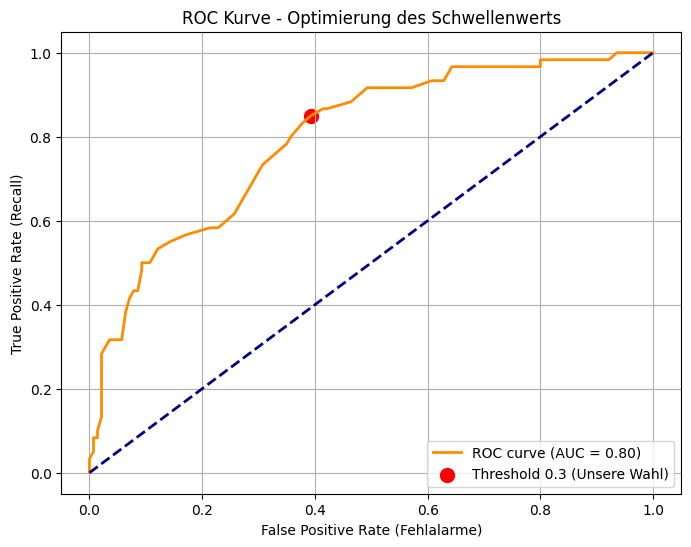

Accuracy: 0.6800

Ergebnis mit Threshold 0.3
Confusion Matrix:
[[85 55]
 [ 9 51]]

Risiken erkannt (Recall): 51 von 60
Übersehene Risiken (False Negatives): 9


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score

# Wahrscheinlichkeiten für die Testdaten holen
y_prob = rf_model.predict_proba(X_test)[:, 1]

# ROC-Kurve berechnen
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotten
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Zufallslinie

# Den Punkt für Threshold 0.3 markieren
idx_03 = (np.abs(thresholds - 0.3)).argmin()
plt.scatter(fpr[idx_03], tpr[idx_03], marker='o', color='red', s=100, label='Threshold 0.3 (Unsere Wahl)')

plt.xlabel('False Positive Rate (Fehlalarme)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Kurve - Optimierung des Schwellenwerts')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Finale Auswertung mit dem gewählten Threshold
threshold = 0.3
y_pred_adjusted = (y_prob >= threshold).astype(int)

print(f"Accuracy: {accuracy_score(y_test, y_pred_adjusted):.4f}")

print(f"\nErgebnis mit Threshold {threshold}")
cm = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix:")
print(cm)

print(f"\nRisiken erkannt (Recall): {cm[1, 1]} von {cm[1, 0] + cm[1, 1]}")
print(f"Übersehene Risiken (False Negatives): {cm[1, 0]}")

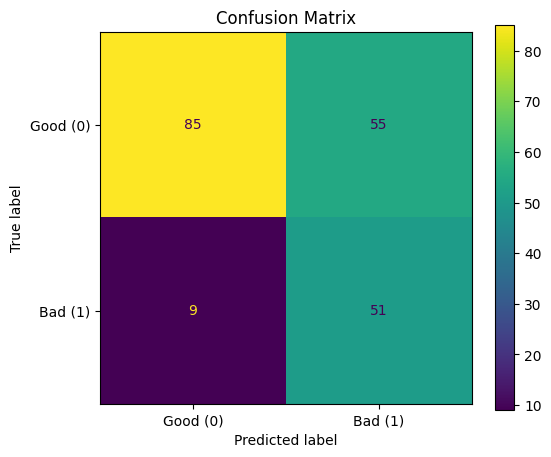

In [ ]:
cm_dynamic = confusion_matrix(y_test, y_pred_adjusted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_dynamic, 
                              display_labels=['Good (0)', 'Bad (1)'])

# Plotten
# cmap='viridis' ist das Standard-Farbschema von sklearn 
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(cmap='viridis', ax=ax)

plt.title("Confusion Matrix")
plt.show()

## SHAP

/Users/renekarmrodt/vscode/jupyter/virtual_environment/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Erstelle Globalen Summary Plot...


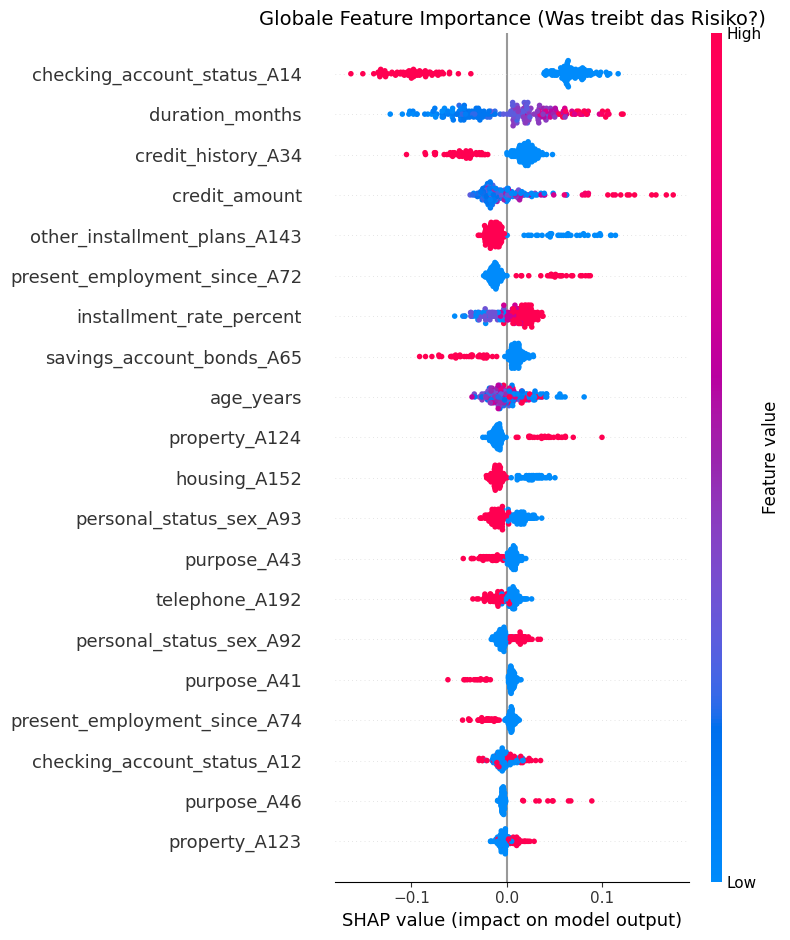

Erstelle Lokalen Waterfall Plot für Kunde 20...


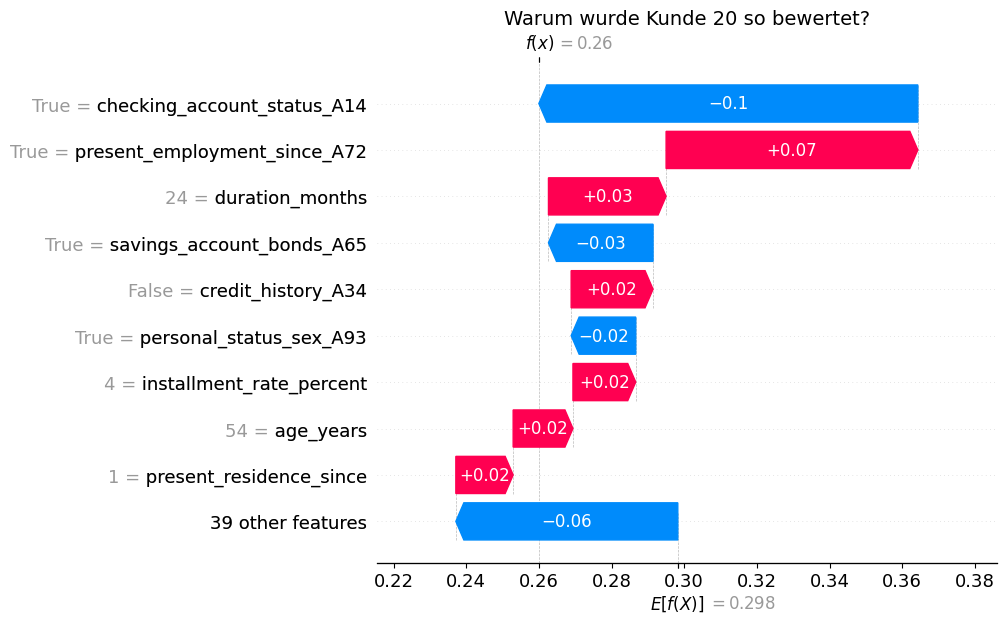

In [ ]:
import shap
import matplotlib.pyplot as plt

# 1. Explainer vorbereiten
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Korrektur für das Array-Format 
if isinstance(shap_values, list):
    shap_values_risk = shap_values[1]
    expected_value_risk = explainer.expected_value[1]
else:
    shap_values_risk = shap_values[:, :, 1]
    expected_value_risk = explainer.expected_value[1]

# --- GRAFIK 1: Global  ---
print("Erstelle Globalen Summary Plot...")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_risk, X_test, show=False)
plt.title("Globale Feature Importance (Was treibt das Risiko?)", fontsize=14)
plt.tight_layout()
plt.show() 

# --- GRAFIK 2:  ---

beispiel_index = 20

print(f"Erstelle Lokalen Waterfall Plot für Kunde {beispiel_index}...")
plt.figure()

shap_object = shap.Explanation(values=shap_values_risk[beispiel_index], 
                               base_values=expected_value_risk, 
                               data=X_test.iloc[beispiel_index], 
                               feature_names=X_test.columns)

shap.plots.waterfall(shap_object, show=False)
plt.title(f"Warum wurde Kunde {beispiel_index} so bewertet?", fontsize=14)
plt.show() 

In [ ]:
import joblib


speicher_paket = {
    "model": rf_model,       # Das trainierte Gehirn
    "X_test": X_test,        # Die Testdaten (für die Demo im Dashboard)
    "y_test": y_test,        # Die wahren Lösungen (für die Confusion Matrix)
    "X_full": df_encoded.drop('target', axis=1) # Damit wir die Spaltennamen für SHAP haben
}

joblib.dump(speicher_paket, 'aibis_projekt_daten.pkl')




✅ Deployment erfolgreich!
Die Datei 'aibis_projekt_daten.pkl' wurde erstellt.
